# About this data

## Features of the dataset:
1.   **Release_Date**: Date when the movie was released.
2.   **Title**: Name of the movie.
3. **Overview** : Brief summary of the movie.
4.   **Popularity**: A very important metric computed by TMDB developers based on:
    *   Number of views per day
    *   Votes per day
    *   Number of users who marked it as "favorite" or "watchlist"
    *   Release date and more
5. **Vote_Count**: Total votes received from viewers.
6. **Vote_Average**: Average rating based on vote count and number of viewers (out of 10).
7.  **Original_Language**: Original language of the movie. Dubbed versions are not considered original.
8.  **Genre**: Categories the movie can be classified under.
9.  **Poster_Url**: URL of the movie poster.


# Import Libraries

In [17]:
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np

# Load the data

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cat-reloaded-data-science/movies")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/movies


In [24]:
df = pd.read_csv("/kaggle/input/movies/mymoviedb.csv", engine='python')

# Explore the data

In [25]:
# First 5 rows
print(df.head())



  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                en                  

In [26]:
# Last 5 rows
print(df.tail())

     Release_Date                                 Title  \
9832   1973-10-15                              Badlands   
9833   2020-10-01                      Violent Delights   
9834   2016-05-06                          The Offering   
9835   2021-03-31  The United States vs. Billie Holiday   
9836   1984-09-23                               Threads   

                                               Overview  Popularity  \
9832  A dramatization of the Starkweather-Fugate kil...      13.357   
9833  A female vampire falls in love with a man she ...      13.356   
9834  When young and successful reporter Jamie finds...      13.355   
9835  Billie Holiday spent much of her career being ...      13.354   
9836  Documentary style account of a nuclear holocau...      13.354   

     Vote_Count Vote_Average Original_Language                        Genre  \
9832        896          7.6                en                 Drama, Crime   
9833          8          3.5                es              

In [27]:
# Random Five rows:
random_rows = df.sample(frac=5/len(df), random_state=42)
print(random_rows)

     Release_Date                         Title  \
9135   2017-12-14                    Steel Rain   
4252   1995-04-21       While You Were Sleeping   
3662   2020-09-18  Violet Evergarden: The Movie   
6454   1996-06-28                    Striptease   
518    2016-02-11                      Zootopia   

                                               Overview  Popularity  \
9135  Amid a coup, a North Korean agent escapes sout...      14.025   
4252  A transit worker pulls commuter Peter off rail...      23.489   
3662  As the world moves on from the war and technol...      26.171   
6454  Bounced from her job, Erin Grant needs money i...      17.670   
518   Determined to prove herself, Officer Judy Hopp...     102.553   

     Vote_Count Vote_Average Original_Language  \
9135        120          7.3                ko   
4252       1321          6.9                en   
3662        195          8.7                ja   
6454        845          5.6                en   
518       13728 

In [29]:
# a row of your choice:
chosen_row = df.iloc[9]
print(chosen_row)

Release_Date                                                2021-11-03
Title                                                         Eternals
Overview             The Eternals are a team of ancient aliens who ...
Popularity                                                    1537.406
Vote_Count                                                        4726
Vote_Average                                                       7.2
Original_Language                                                   en
Genre                                                  Science Fiction
Poster_Url           https://image.tmdb.org/t/p/original/zByhtBvX99...
Name: 9, dtype: object


# Data Cleaning

### Are there null values ?

In [28]:
null_cntr = df.isnull().sum()
print(null_cntr)

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64


### What about duplicates?

In [30]:
number_of_duplicated = df.duplicated().sum()
print(number_of_duplicated)

0


### => Let's check if there are duplicates in the 'Title' column.
### Why do you think that happens? Would you remove or keep them? Explain why.


In [31]:
dup_title_series = df['Title'].value_counts()
dup_titles = dup_title_series[dup_title_series > 1]
print("\nTitles appearing multiple times:")
print(dup_titles)


Titles appearing multiple times:
Title
Beauty and the Beast             4
Alice in Wonderland              4
The Jungle Book                  3
Godzilla                         3
Euphoria                         3
                                ..
The Whole Truth                  2
Beowulf                          2
The Day the Earth Stood Still    2
Leviathan                        2
Down                             2
Name: count, Length: 288, dtype: int64


### Remove the columns you think they arn't important

In [ ]:
# keep titles different years are distinct records

In [32]:
# remove unimportant titles:
df_cleaned = df.drop_duplicates()

### What about the 'Realse_Year' column? , check the data type of it and handle this column .

KeyError: 'Realse_Year'

# Data Visualizations

## I'll now provide a set of questions.
## Please answer each one using visualizations where appropriate and write your answer and insights after that.


1. What is the movie with the highest popularity rate ? and what is the kind of it ?

In [36]:
top = df.loc[df['Popularity'].idxmax(), ['Title', 'Genre', 'Popularity']]
print(f"Most popular movie: {top['Title']}  (Popularity: {top['Popularity']:.2f})")
print(f"Genre(s): {top['Genre']}")

Most popular movie: Spider-Man: No Way Home  (Popularity: 5083.95)
Genre(s): Action, Adventure, Science Fiction


2. which year the largest number of films produced ?

Year with most releases: 2021  (714 films)


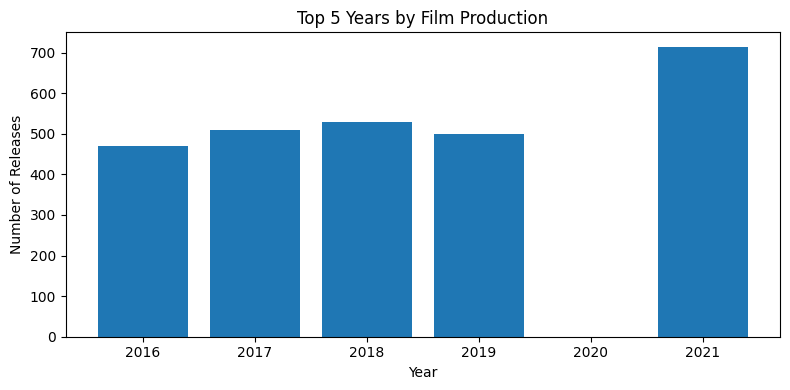

In [37]:
df['Release_Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
year_counts = df['Release_Year'].value_counts().sort_values(ascending=False)

best_year = year_counts.idxmax()
print(f"Year with most releases: {int(best_year)}  ({year_counts.max()} films)")

top5_years = year_counts.head(5).sort_index()
plt.figure(figsize=(8,4))
plt.bar(top5_years.index.astype(int), top5_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.title('Top 5 Years by Film Production')
plt.tight_layout()
plt.show()


3. what is the most of film genere ?

Most common genre: Drama  (466 films)


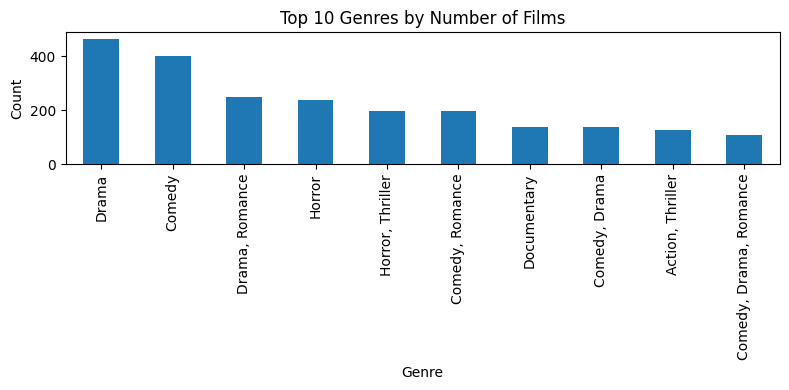

In [38]:
df_exp = df.assign(Genre=df['Genre'].str.split('|')).explode('Genre')

genre_counts = df_exp['Genre'].value_counts()
print(f"Most common genre: {genre_counts.idxmax()} ({genre_counts.max()} films)")

plt.figure(figsize=(8,4))
genre_counts.head(10).plot(kind='bar')
plt.ylabel('Count')
plt.title('Top 10 Genres by Number of Films')
plt.tight_layout()
plt.show()


4. what kind of movies take the highest rating ?

5. which movie is more popular ? and which movie is less popular ?

In [43]:
most = df.loc[df['Popularity'].idxmax(), ['Title','Popularity']]


print(f"Most popular:  {most['Title']}  ({most['Popularity']:.2f})")



Most popular:  Spider-Man: No Way Home  (5083.95)


In [44]:
least = df.loc[df['Popularity'].idxmin(), ['Title','Popularity']]
print(f"Least popular: {least['Title']}  ({least['Popularity']:.2f})")

Least popular: 61.328  (7.10)


#Note : "You are free to make any other visualizations you want and answer as many questions as you can, it’s only up to your imagination"

## Wrap up with your conclusion and a quick summary of the data insights.

## Good Luck ")